In [105]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

## Distribution of the ratings in RateBeer and BeerAdvocate

In [6]:
# turn off warning
pd.options.mode.chained_assignment = None

In [10]:
ratings_ba_df = pd.read_csv('data/BeerAdvocate/ratings_BA.csv')
ratings_rb_df = pd.read_csv('data/RateBeer/ratings_RB.csv')

In [11]:
nbr_ratings_ba = ratings_ba_df.shape[0]
nbr_ratings_rb = ratings_rb_df.shape[0]

print('Number of ratings in BeerAdvocate: {}'.format(nbr_ratings_ba))
print('Number of ratings in RateBeer: {}'.format(nbr_ratings_rb))

Number of ratings in BeerAdvocate: 2715712
Number of ratings in RateBeer: 7122074


In [12]:
ratings_ba_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.672676e+06,2.715712e+06
mean,3.886281e+00,3.796439e+00,3.800010e+00,3.837103e+00,3.846609e+00,3.830343e+00
std,5.956038e-01,6.705662e-01,6.603258e-01,7.044489e-01,6.806139e-01,6.142972e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.530000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.930000e+00
75%,4.250000e+00,4.250000e+00,4.250000e+00,4.500000e+00,4.250000e+00,4.230000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [13]:
ratings_rb_df[['appearance', 'aroma', 'palate', 'style', 'taste', 'overall', 'rating']].describe()

,appearance,aroma,palate,taste,overall,rating
count,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06,7.122074e+06
mean,3.440407e+00,6.418375e+00,3.284702e+00,6.496641e+00,1.321530e+01,3.285543e+00
std,7.737700e-01,1.538632e+00,7.967887e-01,1.538095e+00,3.152041e+00,6.864740e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.200000e+01,3.000000e+00
50%,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,3.400000e+00
75%,4.000000e+00,7.000000e+00,4.000000e+00,7.000000e+00,1.500000e+01,3.700000e+00
max,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01,5.000000e+00


Number of beers in BeerAdvocate: 2715712
Number of beers in RateBeer: 7122074


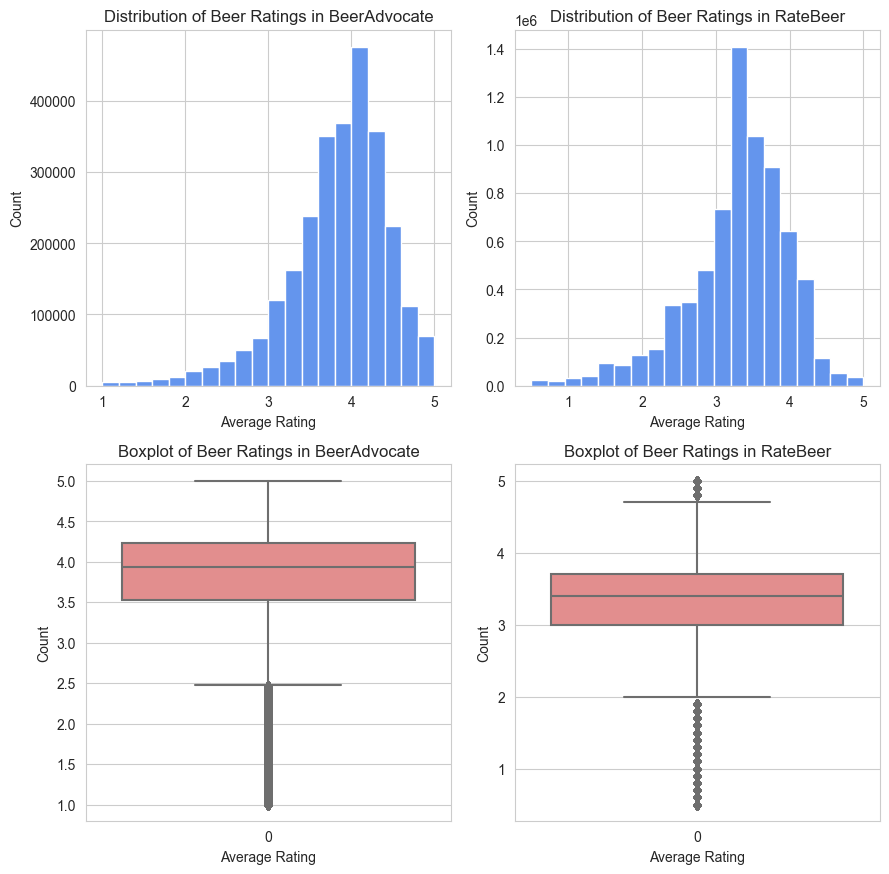

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Number of beers in BeerAdvocate and RateBeer
print("Number of beers in BeerAdvocate:", len(ratings_ba_df))
print("Number of beers in RateBeer:", len(ratings_rb_df))

# BeerAdvocate - Histogram
axes[0, 0].hist(ratings_ba_df['rating'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 0].set_xlabel('Average Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Beer Ratings in BeerAdvocate')

# RateBeer - Histogram
axes[0, 1].hist(ratings_rb_df['rating'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Beer Ratings in RateBeer')

# BeerAdvocate - Boxplot
sns.boxplot(ratings_ba_df['rating'], ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_xlabel('Average Rating')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Boxplot of Beer Ratings in BeerAdvocate')

# RateBeer - Boxplot
sns.boxplot(ratings_rb_df['rating'], ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Boxplot of Beer Ratings in RateBeer')

plt.tight_layout()
plt.show()

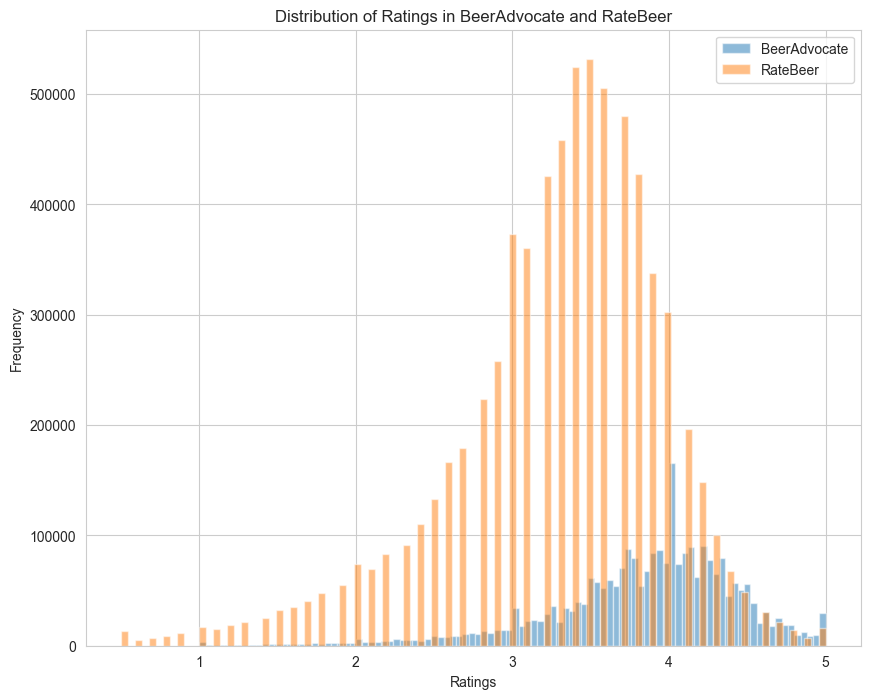

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.hist(ratings_ba_df.rating, bins=100, alpha=0.5, label='BeerAdvocate')
plt.hist(ratings_rb_df.rating, bins=100, alpha=0.5, label='RateBeer')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings in BeerAdvocate and RateBeer')
plt.legend()
plt.show()

By our definition of popularity, we can discard the low ratings.

Since the distribution is different for the two sites, we can discard the low ratings seperately from the two sites. 
The threshold used is the mean average. What is higher than the mean average is considered as good rating. 

In [16]:
mean_ba = ratings_ba_df.rating.mean()
mean_rb = ratings_rb_df.rating.mean()

print("Mean rating in BeerAdvocate:", mean_ba)
print("Mean rating in RateBeer:", mean_rb)

Mean rating in BeerAdvocate: 3.8303429745127655
Mean rating in RateBeer: 3.285543157793643


In [17]:
# drop the rows where the rating is lower than mean rating in BeerAdvocate
ratings_ba_filterd = ratings_ba_df[ratings_ba_df.rating >= mean_ba]

# drop the rows where the rating is lower than mean rating in RateBeer
ratings_rb_filtered = ratings_rb_df[ratings_rb_df.rating >= mean_rb]

In [18]:
nbr_rows_ba = ratings_ba_filterd.shape[0]
nbr_rows_rb = ratings_rb_filtered.shape[0]

print('Number of ratings in BeerAdvocate: {}'.format(nbr_rows_ba))
print('Number of ratings in RateBeer: {}'.format(nbr_rows_rb))

Number of ratings in BeerAdvocate: 1552190
Number of ratings in RateBeer: 4218536


As decided, our focus is on US users. Therefore, we filter out the rows where the user rating is not from the US. 

## US users

In [19]:
users_ba_df = pd.read_csv('data/BeerAdvocate/users.csv')
users_rb_df = pd.read_csv('data/RateBeer/users.csv')

In [21]:
users_ba_df = users_ba_df[['location', 'user_id']]
users_ba_df.columns = ['user_location', 'user_id']

users_rb_df = users_rb_df[['location', 'user_id']]
users_rb_df.columns = ['user_location', 'user_id']

In [22]:
ratings_users_ba_df = pd.merge(ratings_ba_filterd, users_ba_df, on='user_id', how='left')
ratings_users_rb_df = pd.merge(ratings_rb_filtered, users_rb_df, on='user_id', how='left')

In [24]:
ratings_users_ba_df['user_country'] = ratings_users_ba_df['user_location'].str.split(',').str[0]
ratings_users_rb_df['user_country'] = ratings_users_rb_df['user_location'].str.split(',').str[0]

In [29]:
US_country = 'United States'

# keep only the rows where the user country is United States
ratings_users_ba_df = ratings_users_ba_df[ratings_users_ba_df.user_country == US_country]
ratings_users_rb_df = ratings_users_rb_df[ratings_users_rb_df.user_country == US_country]


In [30]:
nbr_rows_ba = ratings_users_ba_df.shape[0]
nbr_rows_rb = ratings_users_rb_df.shape[0]

print('Number of ratings in BeerAdvocate: {}'.format(nbr_rows_ba))
print('Number of ratings in RateBeer: {}'.format(nbr_rows_rb))

Number of ratings in BeerAdvocate: 1367801
Number of ratings in RateBeer: 2049644


In [31]:
# concatenate the two dataframes
ratings_users_df = pd.concat([ratings_users_ba_df, ratings_users_rb_df], ignore_index=True)

Now that our dataframe is filtered, we can check the top beer styles. 

We first try to select the 20 top beers per month. 

## Top Beers by Rating

In [64]:
beers_descr_ba_df = pd.read_csv('data/BeerAdvocate/beers.csv')
beers_descr_rb_df = pd.read_csv('data/RateBeer/beers.csv')

beers_descr_ba_df = beers_descr_ba_df[['beer_id', 'beer_name', 'brewery_id', 'style']]
beers_descr_rb_df = beers_descr_rb_df[['beer_id', 'beer_name', 'brewery_id', 'style']]

# concatenate the two dataframes
beers_descr_df = pd.concat([beers_descr_ba_df, beers_descr_rb_df], ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


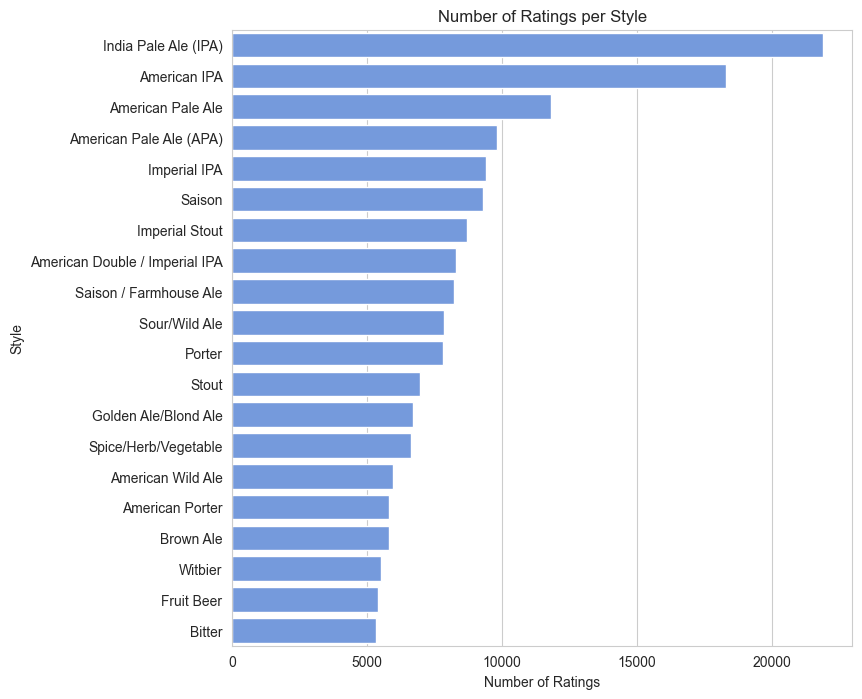

In [65]:
# group by beer_id and count the number of ratings
beer_ratings_df = ratings_users_df.groupby('beer_id')['rating'].count().reset_index()
beer_ratings_df.columns = ['beer_id', 'nbr_ratings']

# merge the two dataframes on beer_id
beer_ratings_df = pd.merge(beer_ratings_df, beers_descr_df, on='beer_id', how='left')

# group by style and count the number of ratings
style_ratings_df = beer_ratings_df.groupby('style')['nbr_ratings'].count().reset_index()

# plot the number of ratings per style in horizontal bar chart with seaborn
plt.figure(figsize=(8, 8))
sns.barplot(x='nbr_ratings', y='style', data=style_ratings_df.sort_values(by='nbr_ratings', ascending=False).head(20), color='cornflowerblue')
plt.title('Number of Ratings per Style')
plt.xlabel('Number of Ratings')
plt.ylabel('Style')
plt.show()


## Analysis of the Beer Styles through time

In [74]:
# transform date column to datetime format
ratings_users_df['date'] = pd.to_datetime(ratings_users_df['date'], unit='s')

ratings_users_df['year'] = ratings_users_df['date'].dt.year
ratings_users_df['month'] = ratings_users_df['date'].dt.month

ratings_users_df['year_month'] = ratings_users_df['year'].astype(str) + '-' + ratings_users_df['month'].astype(str)
ratings_users_df['year_month'] = pd.to_datetime(ratings_users_df['year_month'])

In [77]:
# group by style and year-month and count the number of ratings per style and year-month
style_year_month_ratings_df = ratings_users_df.groupby(['style', 'year_month'])['rating'].count().reset_index(name='nbr_ratings')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

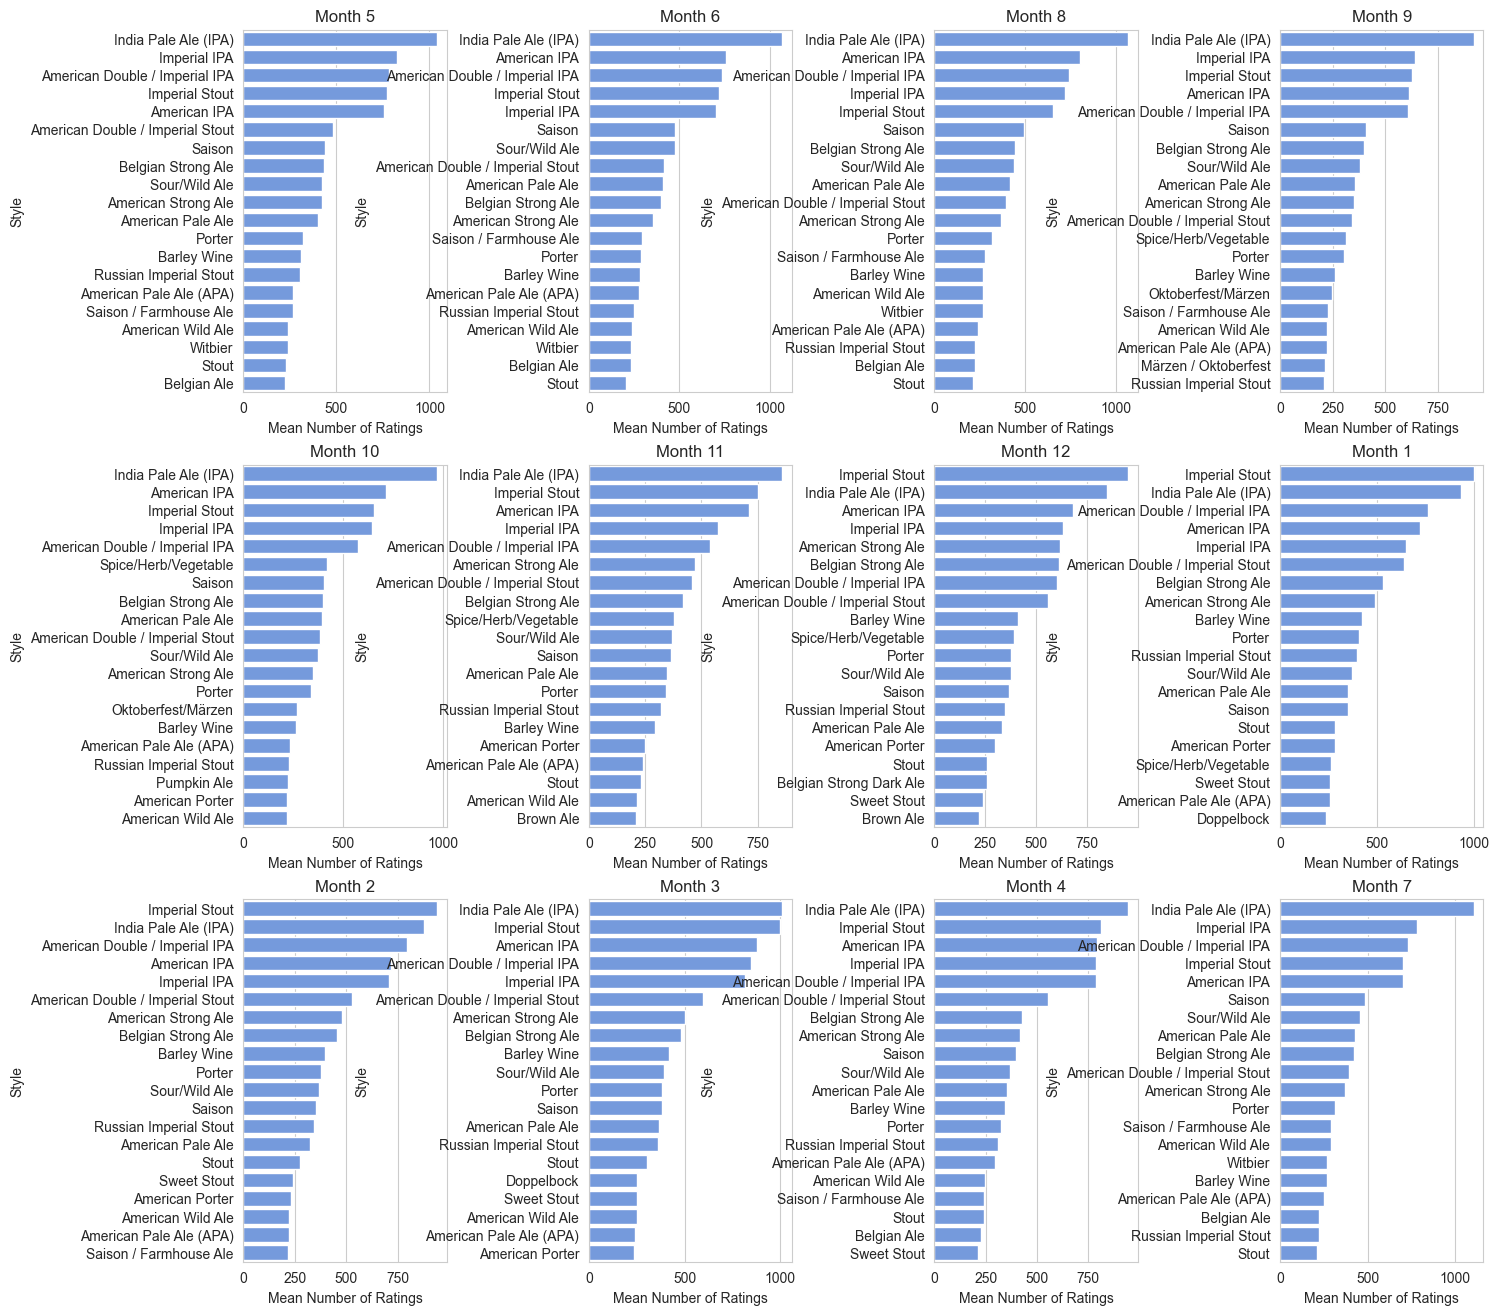

In [88]:
# create column year and month
style_year_month_ratings_df['year'] = style_year_month_ratings_df['year_month'].dt.year
style_year_month_ratings_df['month'] = style_year_month_ratings_df['year_month'].dt.month

months = style_year_month_ratings_df['month'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
fig.subplots_adjust(wspace=0.7)  # Adjust the horizontal space between subplots

# initialize a empty set for the style of the top 20 beers
top_20_styles = set()

for i, month in enumerate(months, start=1):
    style_month_df = style_year_month_ratings_df[style_year_month_ratings_df.month == month]
    
    # group by style and compute the mean rating per style
    style_month_mean_df = style_month_df.groupby('style')['nbr_ratings'].mean().reset_index(name='mean_nbr_ratings')
    
    top_20_style_month_mean_df = style_month_mean_df.sort_values(by='mean_nbr_ratings', ascending=False).head(20)
    
    top_20_styles = top_20_styles.union(set(top_20_style_month_mean_df['style']))
    
    # plot the mean number of ratings per style in a horizontal bar chart
    sns.barplot(x='mean_nbr_ratings', y='style', data=top_20_style_month_mean_df, color='cornflowerblue', ax=axes[(i-1)//4, (i-1)%4])
    
    axes[(i-1)//4, (i-1)%4].set_title('Month {}'.format(month))
    axes[(i-1)//4, (i-1)%4].set_xlabel('Mean Number of Ratings')
    axes[(i-1)//4, (i-1)%4].set_ylabel('Style')

# Show the overall plot
plt.show()
    

In [89]:
# print size of top styles
print('Number of top styles: {}'.format(len(top_20_styles)))

Number of top styles: 29


In [90]:
# print the top styles 
print('Top styles through the months:')
for style in top_20_styles:
    print(style)

Top styles through the months:
American Porter
American Pale Ale
Saison
Barley Wine
American Pale Ale (APA)
American IPA
Saison / Farmhouse Ale
Sour/Wild Ale
Porter
Belgian Strong Ale
Imperial Stout
Stout
India Pale Ale (IPA)
Imperial IPA
Pumpkin Ale
Belgian Strong Dark Ale
American Double / Imperial IPA
American Wild Ale
Oktoberfest/Märzen
Spice/Herb/Vegetable
American Double / Imperial Stout
Doppelbock
Witbier
Brown Ale
Belgian Ale
Sweet Stout
Märzen / Oktoberfest
Russian Imperial Stout
American Strong Ale


Something that we also should take in consideration is the number of unique users in the ratings. Indeed, popularity is defined as the number of top rated beers by a large number of different users. 

For example, there could be a case where a beer is rated only by 5 users, but still gets a lot of top ratings. This does not repesent at all the majority of US users, and the results are therefore biased. 

## Unique users

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


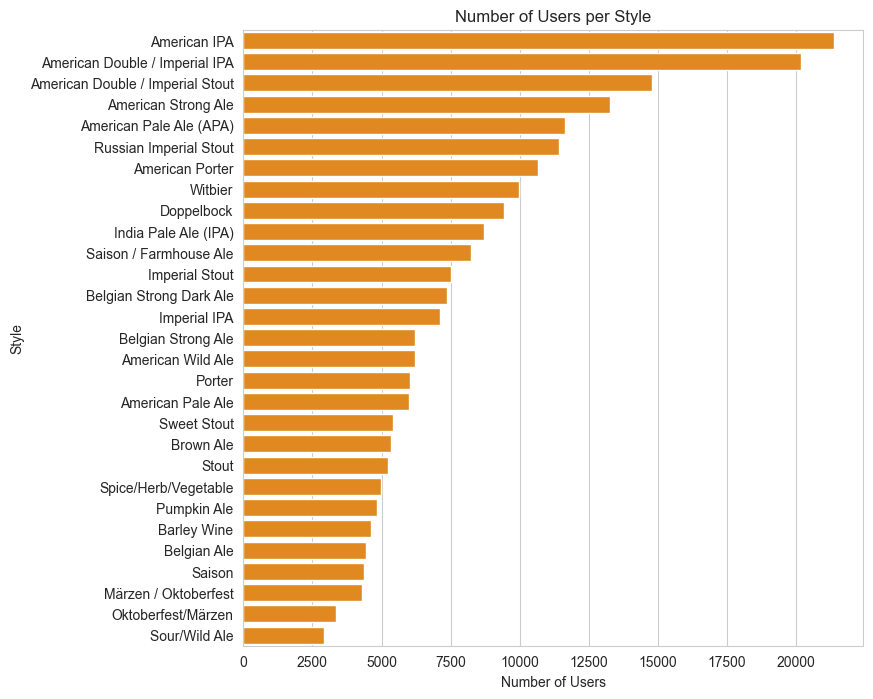

In [94]:
# keep only the rows of ratings_users_df where the style is in the top styles
ratings_users_top_styles_df = ratings_users_df[ratings_users_df['style'].isin(top_20_styles)]

# group by style and count the number of unique users per style
style_users_df = ratings_users_top_styles_df.groupby('style')['user_id'].nunique().reset_index(name='nbr_users')

# plot the number of unique users per style in a vertical bar chart
plt.figure(figsize=(8, 8))
sns.barplot(x='nbr_users', y='style', data=style_users_df.sort_values(by='nbr_users', ascending=False), color='darkorange')
plt.title('Number of Users per Style')
plt.xlabel('Number of Users')
plt.ylabel('Style')
plt.show()




We observe that there is quite a huge difference between the styles. The style 'Sour/Wild Ale' has only 2600 unique users, and the style 'American IPA' has above 20'000, meaning 10 times more. 

If we look at some plots above, the style 'Sour/Wild Ale' is usually around the 10th rank. The question we can ask us is whether this style of beer is really representative to the US users. From how many unique users can we consider that it is representative to the US users? 

Let's take a look at how many data we are left after all the filtering. 

In [95]:
nbr_ratings = ratings_users_top_styles_df.shape[0]

print('Number of ratings: {}'.format(nbr_ratings))

Number of ratings: 2054974


## General Time series analysis

In [102]:
# group by year_month and count the number of ratings per year_month
year_month_ratings_count = ratings_users_top_styles_df.groupby('year_month')['year_month'].count()

### Yearly analysis

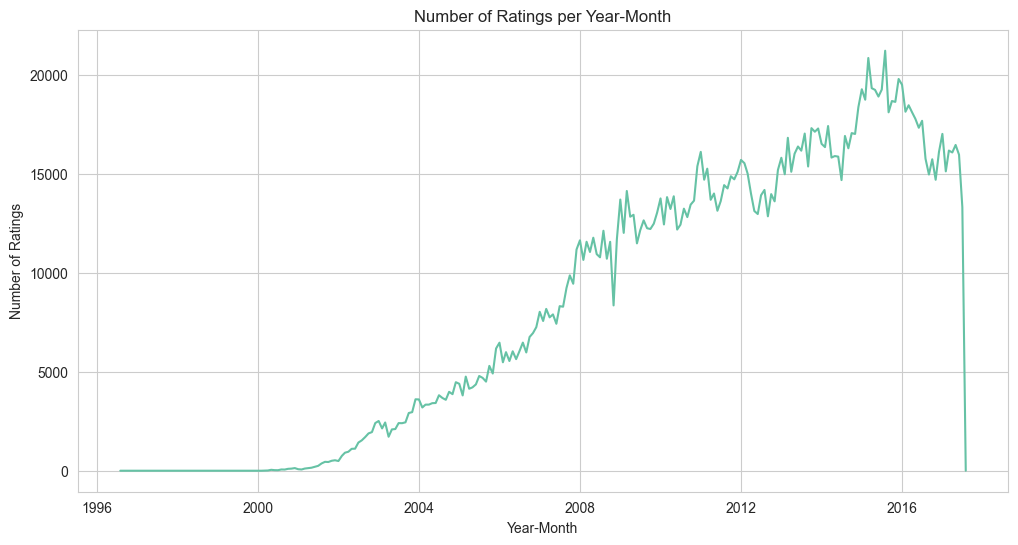

In [106]:
# plot the number of ratings per year_month in a line chart
plt.figure(figsize=(12, 6))
plt.plot(year_month_ratings_count)
plt.title('Number of Ratings per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Ratings')
plt.show()


We can observe some seasonality on the yearly plot. Thus, let's plot the average number of ratings per month.

In [109]:
# creating a new dataframe with the number of ratings per year_month
year_month_ratings_count_df = pd.DataFrame({'year_month': year_month_ratings_count.index, 'nbr_ratings': year_month_ratings_count.values})

# create column year and month
year_month_ratings_count_df['year'] = year_month_ratings_count_df['year_month'].dt.year
year_month_ratings_count_df['month'] = year_month_ratings_count_df['year_month'].dt.month

# keep only rows where the year is greater than 2011 and less than 2017 
year_month_ratings_count_filtered = year_month_ratings_count_df[(year_month_ratings_count_df.year > 2011) & (year_month_ratings_count_df.year < 2017)]

# compute the mean number of ratings per month
mean_ratings_per_month = year_month_ratings_count_filtered.groupby('month')['nbr_ratings'].mean().reset_index(name='mean_nbr_ratings')

# plot with plotly the mean number of ratings per month
fig = px.line(year_month_ratings_count_filtered, x='month', y='nbr_ratings', color='year', title='Mean Number of Ratings per Month')
fig.add_trace(go.Scatter(x=year_month_ratings_count_filtered.month, y=mean_ratings_per_month.mean_nbr_ratings, mode='lines', name='Mean Number of Ratings', line=dict(color='black', dash='dash', width=4)))

fig.show()



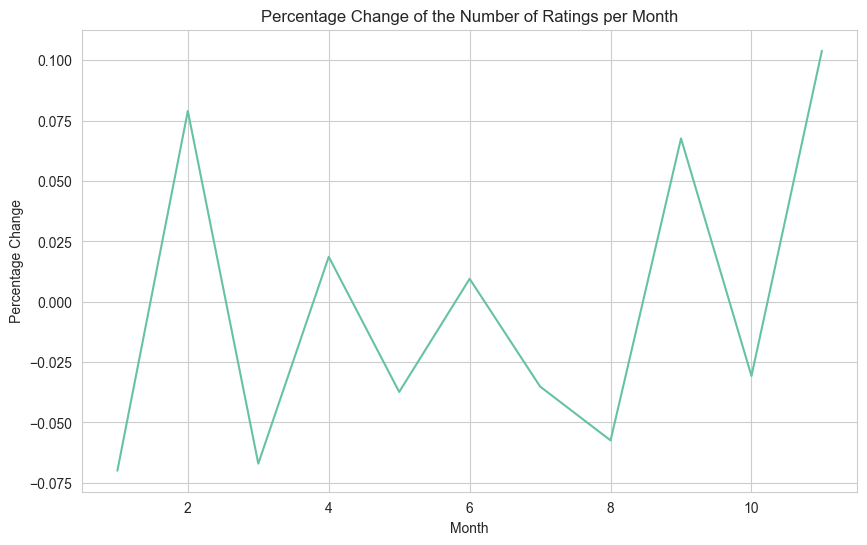

In [113]:
# group by month and count the average number of ratings per month
month_ratings_count = ratings_users_top_styles_df.groupby('month')['month'].count()

month_ratings_count_df = pd.DataFrame({'month': month_ratings_count.index, 'nbr_ratings': month_ratings_count.values})

# compute the percentage change of the number of ratings per month
month_ratings_count_df['pct_change'] = month_ratings_count_df['nbr_ratings'].pct_change()

# plot the percentage change of the number of ratings per month in a line chart
plt.figure(figsize=(10, 6))
plt.plot(month_ratings_count_df['pct_change'])
plt.title('Percentage Change of the Number of Ratings per Month')
plt.xlabel('Month')
plt.ylabel('Percentage Change')
plt.show()